notebook的中间过程可能比较多，结论性的内容会以[Conclusion]字样开头。每一个图表以[View]字样标记。

[Conclusion] 相比于社交媒体上的内容，紧急调度文本（ccdata）蕴含的内容为可靠消息。可以以此为线索去检索社交媒体上的内容。

[Conclusion] 首先我们检查每一个调度文本的含义以及重要性

In [2]:
import pandas as pd
df1 = pd.read_csv("./csv-1700-1830.csv", encoding='latin1')
df2 = pd.read_csv("./csv-1831-2000.csv", encoding='latin1')
df3 = pd.read_csv("./csv-2001-2131.csv", encoding='latin1')

In [3]:
all_call = []
for df in [df1, df2, df3]:
    all_call += df[df['type'] == 'ccdata']['message'].unique().tolist()

all_call = set(all_call)

POLICE UNIT DISPATCHED-CROWD CONTROL
警力派遣-人群管控：派遣警员至现场控制人群（如集会、抗议或骚乱），维持公共秩序。

NARCOTIC ACTIVITY-REPORT
毒品活动报告：涉及毒品交易、持有或使用的举报，需警方介入调查。

SUBJECT STOP
对象拦截：警方对特定个体（非交通场景）进行盘查（如街头可疑人员）。

DISTURBANCE-NOISE
噪音扰民：因噪音（如派对、争执）引发的公共秩序投诉，需警方协调解决。

CHECK ON HAZARD
危险检查：核查潜在危险源（如燃气泄漏、建筑倒塌风险、化学品泄漏等）。

INCOMPLETE CALL FOR POLICE
未完成报警电话：报警人拨打电话后中断，需调度员回拨或派员核实现场情况。

FIRE/MEDICS NEEDED-AMBULANCE DISPATCHED TO FIRE
需消防/医疗支援-救护车派往火灾现场：火灾现场需医疗资源，已派遣救护车。

PURSUIT CONTINUES-POLICE UNITS #253 AND #357/SECOND UNIT JOINS
追捕持续-警员#253与#357参与/第二单位加入：警方追捕行动中，原有警力（253、357号）继续行动，并新增支援单位。

RECKLESS/HAZARDOUS DRIVER-IN PROGRESS
危险驾驶-进行中：驾驶员危险驾驶（如超速、蛇行），需立即拦截。

VANDALISM-REPORT
故意破坏报告：公共或私人财产遭蓄意破坏（如涂鸦、砸窗），需记录并调查。

CRIME SCENE INVESTIGATION-REQUEST
犯罪现场调查请求：通用请求，需鉴证人员对犯罪现场进行勘查。

CRIME SCENE INVESTIGATION-REQUEST-ADDITIONAL UNITS-LOCATION/DWELLING OF INTEREST
犯罪现场调查请求-增派单位至关注地点/住宅：现有警力不足，需增派鉴证人员或警犬队协助。

FELONY ASSAULT/WEAPON-IN PROGRESS
重罪攻击/持械攻击-进行中：涉及武器的严重暴力事件（如持刀、枪击），需紧急处置。

CRIME SCENE INVESTIGATION REQUEST-LOCATION/PERSON/INCIDENT OF INTEREST
犯罪现场调查请求-关注地点/人员/事件：需对特定地点、人员或事件相关证据进行深入调查。

VEHICLE ACCIDENT - REPORT
交通事故报告：车辆碰撞事故，需调度交警、救护车及拖车。

MISDEMEANOR ASSAULT-IN PROGRESS
轻罪攻击-进行中：轻度暴力事件（如肢体冲突、口头威胁），需警方介入制止。

ALARM-SECURE NO CRIME
警报触发-确认无犯罪：警报触发后，经检查未发现犯罪行为（如误报或动物触发）。

KEEP THE PEACE-CROWD CONTROL/ABILA CITY PARK
维持治安-人群管控/阿比拉城市公园：在阿比拉公园部署警力，防止集会演变为冲突。

PURSUIT-POLICE UNIT #253 IN PURSUIT
追捕-警员#253参与追捕：特定警员（253号）正在追捕嫌疑人或车辆。

POLICE UNITS DISPATCHED
警力已派遣：通用术语，表示警员已前往报警现场。

SUSPICIOUS SUBJECT/CIRCUMSTANCES-IN PROGRESS
可疑人员/情况-进行中：现场存在可疑人员或异常活动（如徘徊、窥探），需立即调查。

VEHICLE ACCIDENT - NO OR UNKNOWN INJURIES
交通事故-无伤或伤情不明：事故未造成明显伤亡或伤情需进一步确认。

FIRE/MEDICS NEEDED-AMBULANCE DISPATCHED
需消防/医疗支援-已派救护车：事件需医疗资源，救护车已出发。

CROWD CONTROL-STREET CLOSURE
人群管控-道路封闭：因人群聚集或活动临时封闭街道，确保安全。

FELONY HIT & RUN-IN PROGRESS-WITH INJURY
重罪肇事逃逸-进行中/致人受伤：车辆碰撞后逃逸且造成人员受伤，需紧急追捕。

POLICE NEEDED-POLICE UNITS #101 AND #220 DISPATCHED TO FIRE
需警力支援-警员#101与#220派往火灾现场：火灾现场需警力协助（如疏散、封锁），已派遣指定警员。

PURSUIT-CONTINUES-POLICE UNITS #253 AND #357
追捕持续-警员#253与#357参与：追捕行动仍在进行，指定警员持续参与。

PROWLER
徘徊者：报告有可疑人员在住宅或商业区附近徘徊，疑似预谋犯罪。

ALL UNITS BROADCAST-BUILDING FIRE
全体单位广播-建筑物火灾：向所有警力通报某建筑物火灾，需协作应对。

FIRE/MEDICS DISPATCHED-PEDESTRIAN HIT & RUN
消防/医疗已派遣-行人被撞逃逸：行人被车辆撞击后司机逃逸，已派消防和医疗人员。

FIRE/MEDICS NEEDED-OFFICER DOWN
需消防/医疗支援-警员受伤：警员执勤中受伤，需紧急医疗救助。

CRIME SCENE INVESTIGATION REQUEST-LOCATION/DWELLING OF INTEREST
犯罪现场调查请求-关注地点/住宅：需对特定住宅或地点进行犯罪现场勘查。

ALL UNITS BROADCAST-FELONY HIT & RUN-BLACK VAN/PARTIAL PLATE #L829
全体单位广播-重罪肇事逃逸/黑色货车/部分车牌L829：向所有警力通缉肇事逃逸的黑色货车（部分车牌信息）。

TRAFFIC STOP
交通拦截：警方在道路上拦截车辆进行例行检查（如证件、酒驾）。

SHOPLIFTING
商店盗窃：零售场所发生偷窃行为，需警方到场处理。

DRUNK SUBJECT
醉酒人员：个体因醉酒扰乱公共秩序或需医疗救助。

SUSPICIOUS OCCUPIED VEHICLE-BLACK VAN
可疑载人车辆-黑色货车：报告某黑色货车内有可疑人员或活动，需警方调查。

DIRE EMERGENCY/POLICE NEEDED-OFFICER DOWN-SEND ADDITIONAL UNITS
紧急情况/需警力支援-警员受伤-增派单位：警员执勤中遇袭重伤，需立即增援。

CRIME SCENE INVESTIGATION-REQUEST-LOCATION/PERSON/VEHICLE OF INTEREST
犯罪现场调查请求-关注地点/人员/车辆：需对特定人员、车辆或地点进行关联证据收集。

DIRE EMERGENCY/SWAT TEAM DISPATCHED
紧急情况/特警队出动：极端危险事件（如持枪劫持），需特警队介入。

POSSIBLE FIRE-REPORT
疑似火灾报告：未经核实的火灾报警，需消防人员前往确认。

PARK CHECK
公园巡查：对公园进行例行安全检查（如可疑物品、人员）。

FELONY HIT & RUN - IN PROGRESS-WITH INJURY
重罪肇事逃逸-进行中/致人受伤（同第25条）：事件仍在发生，需紧急处置。

BUSINESS CHECK
商业场所检查：对商铺、办公楼进行安全检查或响应报警。

FIRE/MEDICS NEEDED-FIRE TRUCK #23 DISPATCHED TO FIRE
需消防/医疗支援-消防车#23派往火灾现场：已派遣指定消防车（23号）前往火灾现场。

FIRE/MEDICS NEEDED-FIRE TRUCKS #41 AND #57 DISPATCHED TO FIRE
需消防/医疗支援-消防车#41与#57派往火灾现场：多辆消防车（41、57号）已出发应对火灾。

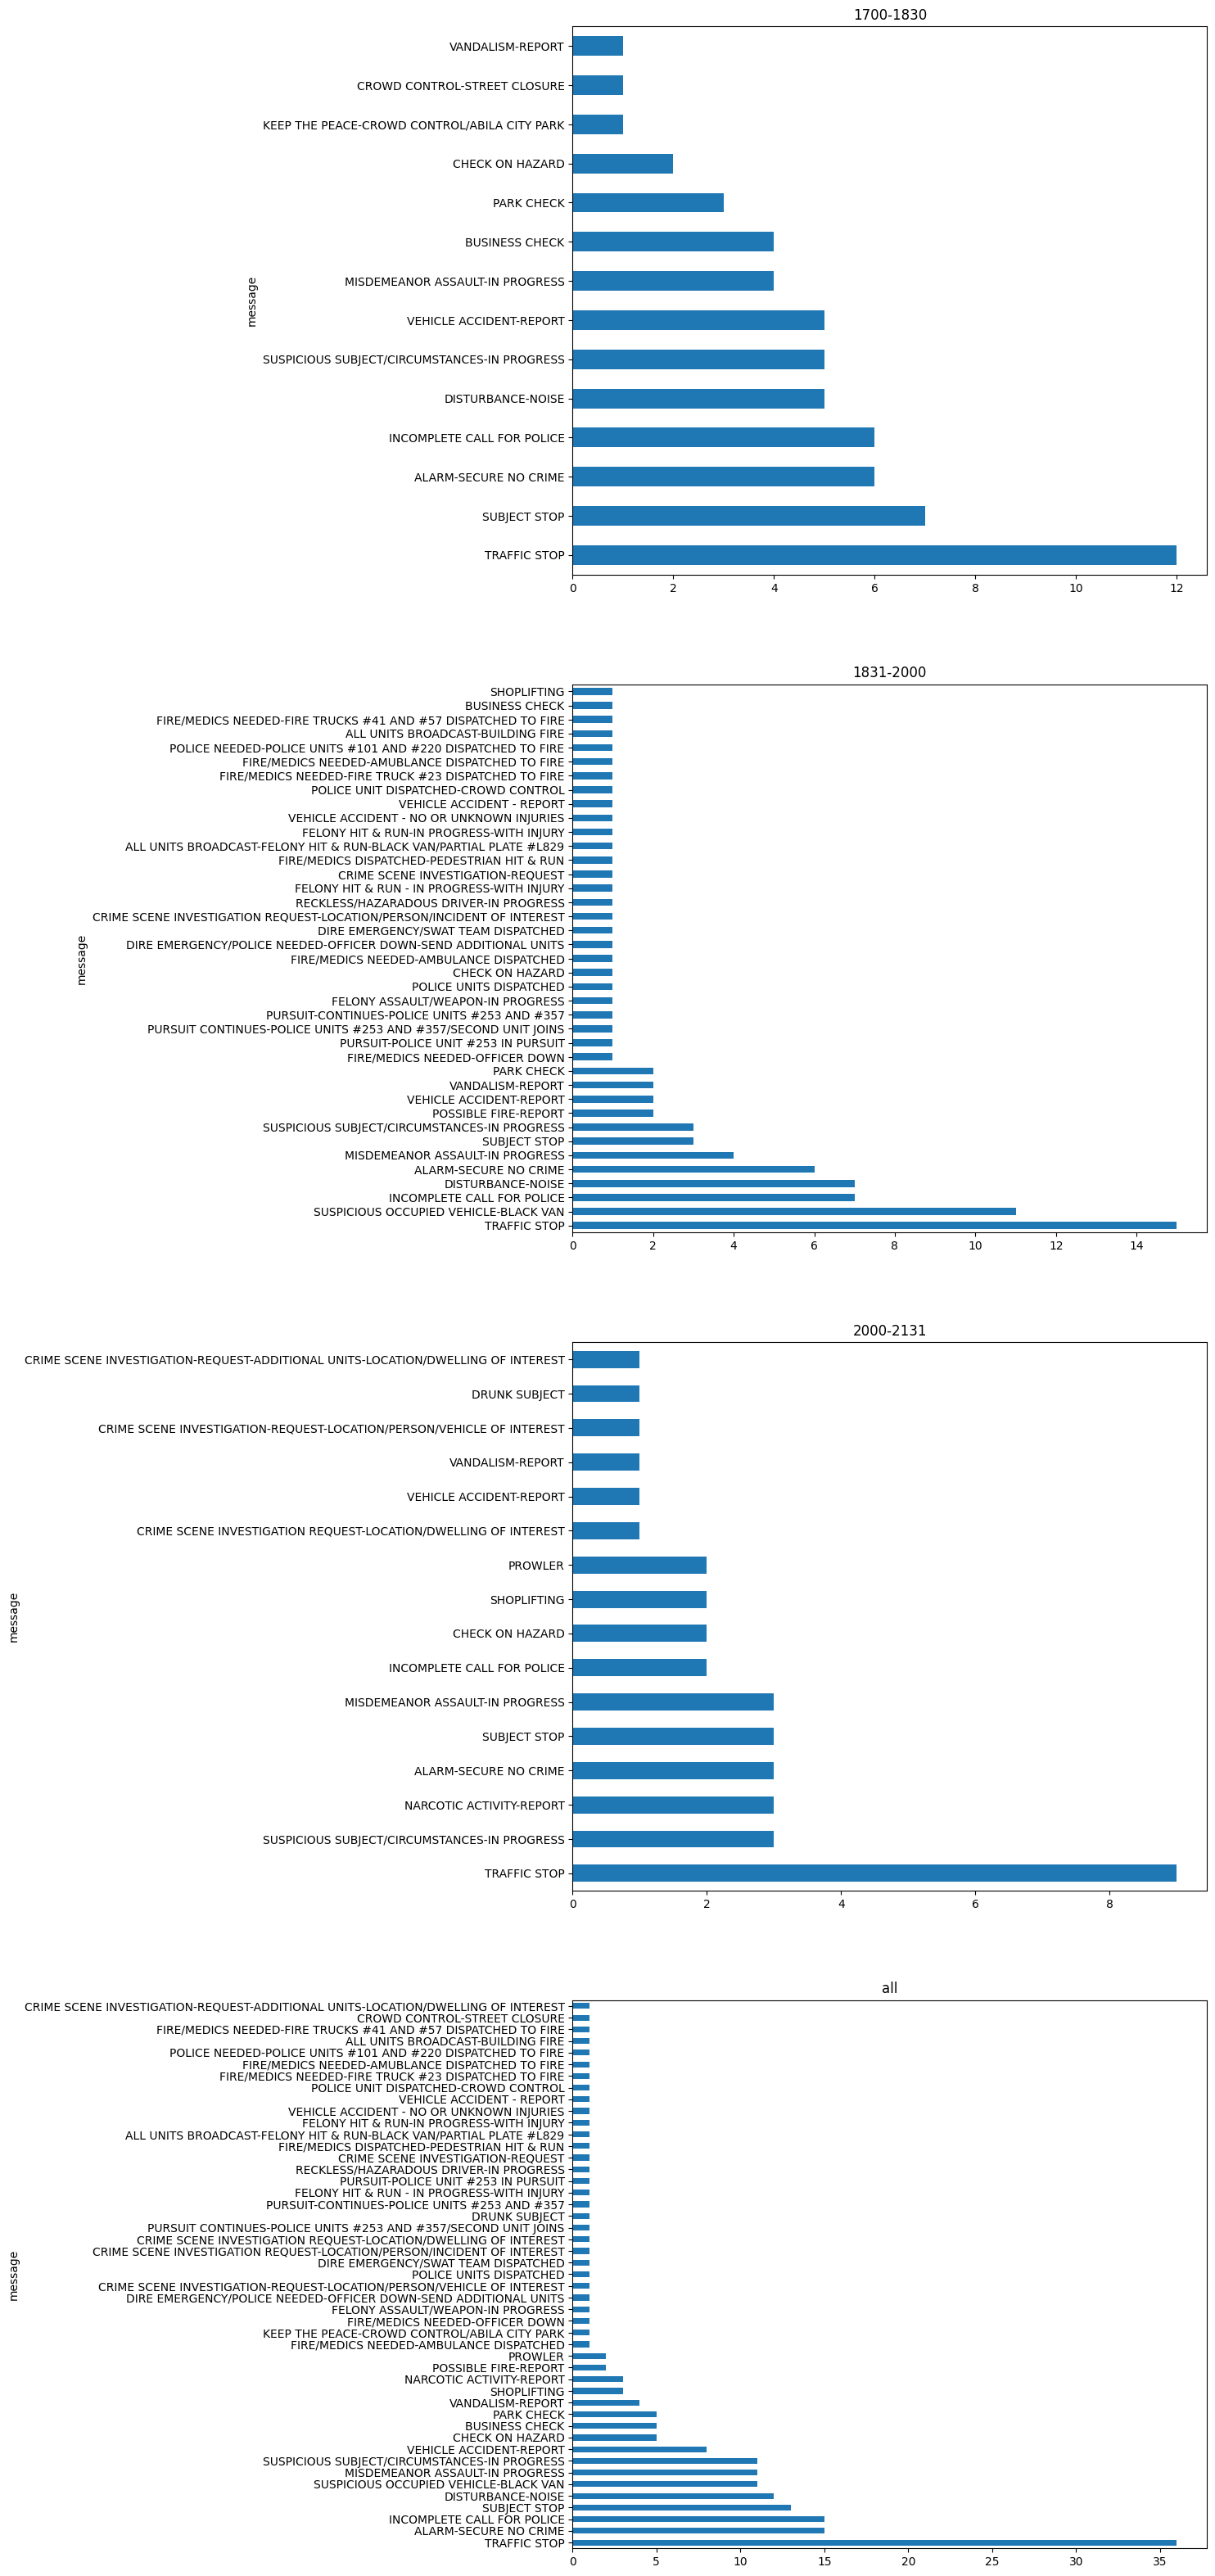

In [4]:
from matplotlib import pyplot as plt
dfs = [df1, df2, df3, pd.concat([df1, df2, df3], ignore_index=True)]
time = ['1700-1830', '1831-2000', '2000-2131', 'all']
plt.figure(figsize=(10, 40))
for i, df in enumerate(dfs):
    plt.subplot(4,1,i+1)
    a = df[df['type'] == 'ccdata']['message'].value_counts()
    a.plot(kind='barh')
    plt.title(time[i])
    # plt.xticks(rotation=90, ha='right')

In [5]:
# 统计某个时间段内不同指令的出现次数

def calculate_call_kinds(df, time_start=None, time_end=None):
    target_df = df[df['type'] == 'ccdata']
    if time_start is not None:
        target_df = target_df[df["date(yyyyMMddHHmmss)"] >= time_start]
    if time_end is not None:
        target_df = target_df[df["date(yyyyMMddHHmmss)"] <= time_end]
    return len(target_df['message'].unique().tolist())

dfs = [df1, df2, df3]
counts = []
for df in dfs:
    counts.append(calculate_call_kinds(df))
print(counts)

[14, 39, 16]


[Concolusion][View 1 紧急调度指令可视化]

[统计量 指令出现频次]
按照指令的稀有度进评价，在整个时间段内越少出现的指令，意味着更稀有的事件，往往更加严重，可能需要优先关注。根据稀有度，为每个指令赋予不同的颜色，其他图展示指令时，将统一使用对应的指令颜色。

[一个问题3的思路][统计量 时间段内不同指令数量 模块1]
当一个时间段内出现的调度指令种类开始增多时，往往意味着更稀有的紧急事件发生，往往更加严重。可以用上一个单元格的`calculate_call_kinds`函数统计指定时间段内的指令数量。可以在系统上开辟一个区域显示这一数字。

[重要信息]
ALL UNITS BROADCAST携带了需要通报所有单元的重要信息，应特别关注。

In [6]:
# 处理重要字段
top_1 = ["ALL UNITS BROADCAST"]
top_2 = []

# df3[df3['message'].str.contains("OFFICER DOWN")]
print(df2[df2['message'].str.contains("ALL UNITS BROADCAST")]['message'].iloc[0])
print(df2[df2['message'].str.contains("ALL UNITS BROADCAST")]['message'].iloc[1])

ALL UNITS BROADCAST-BUILDING FIRE
ALL UNITS BROADCAST-FELONY HIT & RUN-BLACK VAN/PARTIAL PLATE #L829


In [20]:
import re
import numpy as np
from tqdm import tqdm

def split_based_on_time_interval(dataframe, time_interval_limit=10):
    time_interval_limit *= 100
    time_diff = dataframe["date(yyyyMMddHHmmss)"].diff().dropna()
    split_indices = np.arange(1, len(time_diff) + 1)[time_diff > time_interval_limit].tolist()
    split_points = [0] + split_indices + [len(df)]

    split_dfs = []
    for start, end in zip(split_points[:-1], split_points[1:]):
        chunk = dataframe.iloc[start:end] 
        if len(chunk) > 1:
            split_dfs.append(chunk)
    return split_dfs

def correlate_same_location_event(datum, df, time_interval_limit=10):    
    matched_data_list = []
    location = datum[' location']
    for row in df.iterrows():
        if row[1][" location"] == location and datum.name != row[1].name:
            matched_data_list.append(row[1])
    if len(matched_data_list) != 0:
        matched_data_list.append(datum)
        matched_data_list = pd.DataFrame(matched_data_list)
        matched_data_list = matched_data_list.sort_index()
        dfs = split_based_on_time_interval(matched_data_list, time_interval_limit)
        return dfs
    else:
        return []

def correlate_same_units_event(datum, df, time_interval_limit=10):
    ids = re.findall(r'#(\d+)', datum['message'])
    # mission = datum['message'].replace('-', ' ').split()[:2]
    matched_data_list = []
    for row in df.iterrows():
        # mission_target = row[1]['message'].replace('-', ' ').split()[:2]
        if datum.name != row[1].name:
            flag = False
            involved_ids = re.findall(r'#(\d+)', row[1]["message"])
            for i in ids:
                if i in involved_ids:
                    flag = True
                    break
            if flag:  # or (len(mission_target) > 2 and mission == mission_target):
                matched_data_list.append(row[1])
    if len(matched_data_list) != 0:
        matched_data_list.append(datum)
        matched_data_list = pd.DataFrame(matched_data_list)
        matched_data_list = matched_data_list.sort_index()
        dfs = split_based_on_time_interval(matched_data_list, time_interval_limit)
        return dfs
    else:
        return []

df = df2[df2['type'] == 'ccdata']
all_list = []
for d in tqdm(df.iterrows(), total=len(df)):
    matched_data_list_1 = correlate_same_location_event(d[1], df)
    matched_data_list_2 = correlate_same_units_event(d[1], df)
    all_list += matched_data_list_1
    all_list += matched_data_list_2

unique_sorted_dfs = []
for df in all_list:
    if not any(df.equals(udf) for udf in unique_sorted_dfs):
        unique_sorted_dfs.append(df)

100%|██████████| 91/91 [00:00<00:00, 166.82it/s]


In [21]:
len(unique_sorted_dfs)

5

In [28]:
unique_sorted_dfs[4]

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
1204,ccdata,20140123194000,NaN,FELONY ASSAULT/WEAPON-IN PROGRESS,NaN,NaN,N. Alexandrias St / N. Ithakis St
1295,ccdata,20140123194157,NaN,FIRE/MEDICS NEEDED-OFFICER DOWN,NaN,NaN,N. Alexandrias St / N. Ithakis St
1325,ccdata,20140123194228,NaN,FIRE/MEDICS NEEDED-AMBULANCE DISPATCHED,NaN,NaN,N. Alexandrias St / N. Ithakis St
1382,ccdata,20140123194337,NaN,DIRE EMERGENCY/POLICE NEEDED-OFFICER DOWN-SEND...,NaN,NaN,N. Alexandrias St / N. Ithakis St
1424,ccdata,20140123194411,NaN,POLICE UNITS DISPATCHED,NaN,NaN,N. Alexandrias St / N. Ithakis St
1439,ccdata,20140123194428,NaN,DIRE EMERGENCY/SWAT TEAM DISPATCHED,NaN,NaN,N. Alexandrias St / N. Ithakis St


[Conclusion][View 1 紧急调度指令可视化]

[连续事件] 同一地点发生的事件，同一警力正在跟踪的连续事件应该引起关注。上面这一段代码通过`correlate_same_location_event` 和 `correlate_same_units_event` 将这些连续事件从数据中提取出来。可以在地图上显示并进行跟踪。

[Seperate] 接下来处理mbdata。

In [39]:
# 整合所有数据
all_df = pd.concat([df1, df2, df3])
all_df = all_df[all_df['type'] == "mbdata"]
all_df['share_count'] = 0

In [59]:
# 统计每条休息被转发次数
for i, row in all_df.iterrows():
    if "RT" in row['message']:
        text = row['message']
        first_space = text.find(' ')
        # if first_space == -1:
        #     return ''
        second_space = text.find(' ', first_space + 1)
        # if second_space == -1:
        #     return ''
        text = text[second_space + 1:]
        if len(all_df[all_df['message'] == text]['share_count']) == 0:
            print(text)
        else:
            count = all_df[all_df['message'] == text]['share_count'].values[0]
            all_df.loc[all_df['message'] == text, 'share_count'] += 1
        

In [60]:
all_df.sort_values('share_count', ascending=False)

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,share_count
660,mbdata,20140123190500,HomelandIlluminations,Traffic being diverted from area. #HI,NaN,NaN,NaN,8
152,mbdata,20140123171301,AbilaPost,Special guest Dr. Audrey McConnel Newman will ...,NaN,NaN,NaN,8
1125,mbdata,20140123193600,HomelandIlluminations,Reports coming in about a possible hit and run...,NaN,NaN,NaN,8
149,mbdata,20140123184400,HomelandIlluminations,Building fire at Achilleos and Madeg. Responde...,NaN,NaN,NaN,8
537,mbdata,20140123203252,AbilaPost,Please avoid the area surrounding Gelatogalore...,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...
429,mbdata,20140123185227,Officia1AbilaPost,Death toll mounts - #kronoskidnapping. smad.co...,NaN,NaN,NaN,0
431,mbdata,20140123185228,GreyCatCollectibles,and not in her apt,NaN,NaN,NaN,0
432,mbdata,20140123185237,InternationalNews,Evacuation in fire in Dancing Dolphin #IntNews,NaN,NaN,NaN,0
434,mbdata,20140123185237,windAvatar,feel slightly guilty but can't look away #scha...,NaN,NaN,NaN,0


In [93]:
# 提取带话题的消息，并将转发数量按话题聚合
from collections import defaultdict

def agg_based_on_topics(all_df):
    topics_df = defaultdict(lambda : [])
    shared_df = all_df[all_df['share_count'] != 0]
    for i, row in all_df.iterrows():
        text = row['message']
        if "#" in text:
            topics = re.findall(r'#(\w+)', text)
            for topic in topics:
                topics_df[topic].append(row)

    for k,v in topics_df.items():
        topics_df[k] = pd.DataFrame(v).sort_values('share_count', ascending=False)

    return  topics_df 

def summary_topics_df(topics_df):
    topics_df_summary = {}
    for k,v in topics_df.items():
        topics_df_summary[k] = {"data" : v}
        topics_df_summary[k]["topic_share_count"] = v['share_count'].sum()
        topics_df_summary[k]["max_share_count"] = v['share_count'].max()

    return topics_df_summary

In [94]:
topics_df_summary = summary_topics_df(agg_based_on_topics(all_df))
topic_sorted_list = sorted(topics_df_summary.items(), key=lambda x: x[1]["topic_share_count"], reverse=True) # 排序后的话题

[Conclusion][View 2 社交媒体信息展示]
上述代码对mbdata按照话题进行了聚合，并统计了消息的转发数，`topics_df_summary`是一个字典，其键是各种话题，其值是一个字典，存储了话题相关的所有消息，该话题总的转发数，以及最大转发数，而`topic_sorted_list`将`topics_df_summary`的每个键值对按照话题总转发数进行了排序，便于进行数据展示。

设想中，这一视图以类似词云的方式展开，每个话题对应了视图中的一个圆，话题的转发数越大，圆越大。在这个视图中，允许对话题进行点击，从而显示该话题下的所有消息，消息按照转发数、发布人的权重综合排序，转发数高的靠前展示，转发数相同的，按照发布人权重高的优先展示。

同时，可以进行一次视图切换，视图中的一个圆将对应发布人。发布人旗下的转发数越大，圆越大。发布人权重的计算将在下一部分计算。

In [103]:
author_weight = all_df.groupby('author')['share_count'].sum().sort_values(ascending=False)

`author_weight`为账号所发消息的被转数量总和排序得到的作者列表序列。